In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading a dataset
dataset = pd.read_excel("drive/MyDrive/cmsc828w_personal/CCPP/Folds5x2_pp.xlsx", sheet_name = 0)
# dataset = dataset.sample(frac = 1)

In [ ]:
#Splitting training and testing data
n_rows = dataset.shape[0]
split_idx = int(n_rows * 0.1)
test_data = dataset.iloc[n_rows-split_idx:]
train_val_data = dataset.iloc[:n_rows-split_idx]
val_data = train_val_data[train_val_data.index % 5 == 0]
train_data = train_val_data[~train_val_data.index.isin(val_data.index)]

In [ ]:
#Normalizing data
def normalize_features(raw_data, a=-0.9, b=0.9):
  for col in raw_data.columns:
    feature_min = raw_data[col].min()
    feature_max = raw_data[col].max()
    raw_data[col] = raw_data[col].apply(lambda x: ((b - a) * (x - feature_min) / (feature_max - feature_min)) + a)
  return raw_data

normalize_features(train_data).head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,AT,V,AP,RH,PE
1,0.291671,0.304270,0.306421,-0.091206,-0.346826
2,-0.731728,-0.450320,-0.046590,0.706488,0.725313
3,0.071388,0.123630,-0.132603,0.332493,-0.295633
4,-0.440567,-0.511174,-0.177850,0.814584,0.369632
6,-0.182040,-0.304270,0.036735,0.298713,0.210716


### The error signal at an output neuron is propagated backwards up the network towards the inputs, modulating the connecting weights on the way in a manner that minimizes the error. This is the core philosophy behind back-propagation!

### Here, we create the layer class that, upon call up, can forward and back-propagate a given input!

###Here the local gradient at a given layer is calculated in terms of the local gradient of the next forward layer using 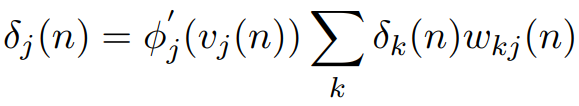

In [ ]:
#Defining activation functions
def tanh(x):
  return np.tanh(x)

def tanh_prime(x):
  return 1 - np.tanh(x)**2

#Building the Layer class
class Layer():
  def __init__(self, input_size, output_size):
    self.weights = np.random.random(size=(output_size, input_size))
    self.biases = np.random.random(size=(output_size, ))
    self.inputs = None
    self.outputs = None

  def activation(self, x, func="tanh"):
    if func == "tanh":
      return tanh(x)
  
  def activation_prime(self, x, func="tanh"):
    if func == "tanh":
      return tanh_prime(x)

  def forward_propagate(self, input_data):
    self.inputs = input_data
    self.outputs = self.activation(np.dot(self.weights, self.inputs) + self.biases)
    return self.outputs
  
  def back_propagate(self, output_error, learning_rate):
    local_gradient = output_error * self.activation_prime(np.dot(self.weights, self.inputs) + self.biases) # local gradient at a given layer in terms of the local gradient of the next forward layer
    self.weights += learning_rate * local_gradient * self.inputs
    self.biases += learning_rate * local_gradient
    return local_gradient


### We create the network class here, using which we can add layers, create a model, fit the model to the input data (training) and predict outputs post-training!   

In [ ]:
#Defining the loss function
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

#Derivative of loss function
def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

#Building the network class
class Network():
  def __init__(self):
    self.layers = list()
  
  def add_layer(self, layer):
    self.layers.append(layer)

  def loss(self, y_true, y_pred, func="mse"):
    if func == "mse":
      return mse(y_true, y_pred)

  def predict(self, input_data):
    results = list()
    for i in range(len(input_data)):
      output = input_data[i]
      for layer in self.layers:
        output = layer.forward_propagate(output)
      results.append(output)
    return results

  def fit(self, x_train, y_train, epochs, learning_rate):
    for e in range(epochs):
      err = 0
      for i in range(len(x_train)):
        output = x_train[i]
        for layer in self.layers:
          output = layer.forward_propagate(output)
        
        err += self.loss(y_train[i], output)

        error = y_train[i] - output
        for layer in reversed(self.layers):
          local_gradient = layer.back_propagate(error, learning_rate)   #Recursively computing the local gradients!
          error = np.dot(local_gradient, layer.weights)

      err /= len(x_train) 
      print("Epoch %d/%d     |     error=%f" % (e+1, epochs, err))


### Let's try out the model here: we create an ANN with 3 hidden layers, each having 4 nodes and then fit the model to our training data. We can see the error approaching 0, which means that the network has started learning!

In [ ]:
train_arr = train_data.to_numpy()
x_train = train_arr[:, :4] 
y_train = train_arr[:, 4]
net = Network()
net.add_layer(Layer(4, 4))
net.add_layer(Layer(4, 4))
net.add_layer(Layer(4, 1))
net.fit(x_train, y_train, 100, 0.001)

Epoch 1/100     |     error=0.177538
Epoch 2/100     |     error=0.058814
Epoch 3/100     |     error=0.032396
Epoch 4/100     |     error=0.027316
Epoch 5/100     |     error=0.024312
Epoch 6/100     |     error=0.022150
Epoch 7/100     |     error=0.020525
Epoch 8/100     |     error=0.019264
Epoch 9/100     |     error=0.018260
Epoch 10/100     |     error=0.017445
Epoch 11/100     |     error=0.016774
Epoch 12/100     |     error=0.016214
Epoch 13/100     |     error=0.015744
Epoch 14/100     |     error=0.015346
Epoch 15/100     |     error=0.015009
Epoch 16/100     |     error=0.014722
Epoch 17/100     |     error=0.014477
Epoch 18/100     |     error=0.014268
Epoch 19/100     |     error=0.014090
Epoch 20/100     |     error=0.013938
Epoch 21/100     |     error=0.013809
Epoch 22/100     |     error=0.013699
Epoch 23/100     |     error=0.013605
Epoch 24/100     |     error=0.013525
Epoch 25/100     |     error=0.013457
Epoch 26/100     |     error=0.013400
Epoch 27/100     |   